<a href="https://colab.research.google.com/github/Chayanck123/Algorithm_Visualizer/blob/main/ML_for_Stock_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello World..!")

Hello World..!


<h2> Stock Visualizer </h2>

Step 1: Getting some historical data.

Libraries or Modules:

Yahoo Finance Model
Create Charts
Handle Dataframes -  Pandas
We need Datetime Functions


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


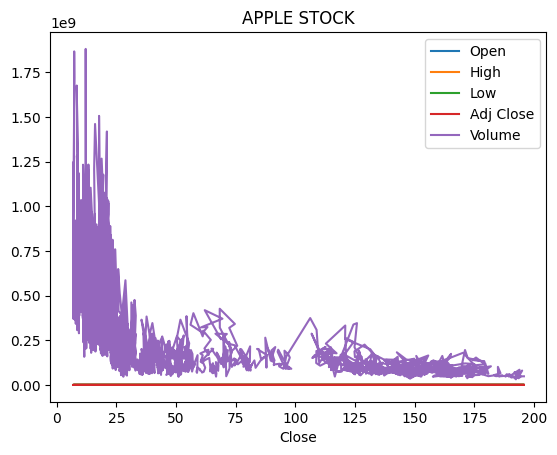

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date,time
# Install Yahoo finance Libraries

try:
  import yfinance
except:
  !pip install -q yfinance
  import yfinance

try:
  import yahoofinancials
except:
  !pip install -q yahoofinancials
  import yahoofinancials

import yfinance as yf
from yahoofinancials import YahooFinancials

import warnings
warnings.filterwarnings("ignore")


# Download historical data

df = yf.download('AAPL',start='2010-01-01',end=date.today(),progress=False,)

#Create a simple Chart

df.plot('Close',title='APPLE STOCK')

plt.show()

Technical Analysis Indicators and we are going to plot them

,Open,High,Low,Close,Adj Close,Volume,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100)
Date,,,,,,,,,,,,
2010-05-26,8.931429,9.004643,8.705357,8.718214,7.409979,850654000,38.355163,41.457509,45.711120,-56.178575,5.938006,69.276664
2010-05-27,8.950000,9.067500,8.896786,9.048214,7.690466,666282400,88.107545,57.073471,53.064089,-13.311516,36.745689,85.860512
2010-05-28,9.263929,9.264286,9.048214,9.174286,7.797616,815614800,92.643850,61.634753,55.541488,21.097389,61.682818,98.414024
2010-06-01,9.274643,9.497857,9.248571,9.315357,7.917522,876472800,96.031538,66.308343,58.200193,61.746178,92.576151,113.435571
2010-06-02,9.447857,9.457143,9.297500,9.426786,8.012229,688548000,97.702794,69.708792,60.223610,66.720387,95.928354,114.272333


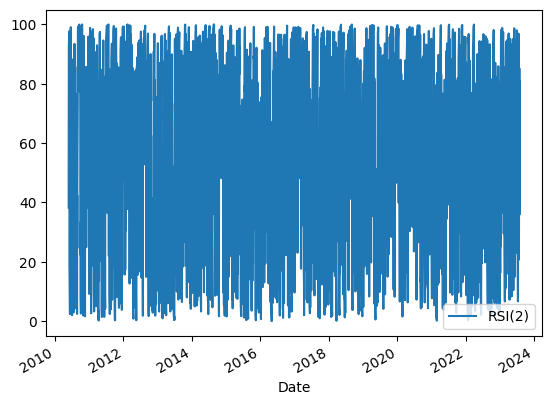

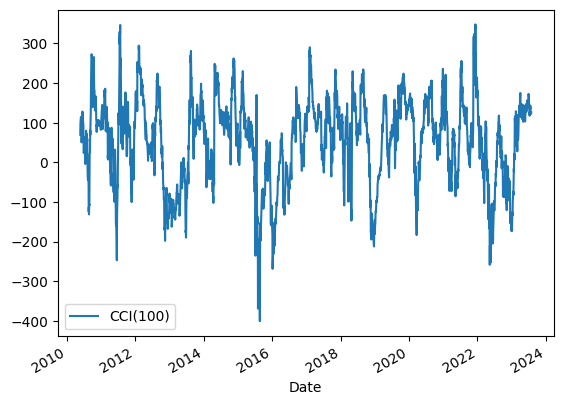

In [3]:
try:
  import pandas_ta as ta
except:
  !pip install -q pandas_ta
  import pandas_ta as ta

df['RSI(2)'] = ta.rsi(df['Close'],length=2)
df['RSI(7)'] = ta.rsi(df['Close'],length=7)
df['RSI(14)'] = ta.rsi(df['Close'],length=14)

df['CCI(30)'] = ta.cci(close = df['Close'],length =30,high=df['High'],low=df['Low'])
df['CCI(50)'] = ta.cci(close = df['Close'],length =50,high=df['High'],low=df['Low'])
df['CCI(100)'] = ta.cci(close = df['Close'],length =100,high=df['High'],low=df['Low'])


#Drop NaN Values


df = df.dropna()

# Create a plot showing some of our indicators

df.plot(y='RSI(2)')

df.plot(y='CCI(100)')

#Hows's our current dataframe going

df.head()

Prepare our data labelling
What do we want to do over here?
When we place our trade : Buy at open(Over the next day). We want to close our trade:At the next day open

Formula:
Handling the returns this way: Buy:Open(-1)  Closing:Open(-2)

We want to label our data in the following way:

BUY SIGNAL: Open(-2) > Open(-1)
SELL SIGNAL: Open(-2) < Open(-1)

Indicators the current situations, and our label take alook ahead of time to determine if we have a pattern.


In [4]:
import numpy as np

In [5]:
df['Label'] = np.where(df['Open'].shift(-2).gt(df['Open'].shift(-1)),"1","0")
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100),Label
Date,,,,,,,,,,,,,
2010-05-26,8.931429,9.004643,8.705357,8.718214,7.409979,850654000,38.355163,41.457509,45.711120,-56.178575,5.938006,69.276664,1
2010-05-27,8.950000,9.067500,8.896786,9.048214,7.690466,666282400,88.107545,57.073471,53.064089,-13.311516,36.745689,85.860512,1
2010-05-28,9.263929,9.264286,9.048214,9.174286,7.797616,815614800,92.643850,61.634753,55.541488,21.097389,61.682818,98.414024,1
2010-06-01,9.274643,9.497857,9.248571,9.315357,7.917522,876472800,96.031538,66.308343,58.200193,61.746178,92.576151,113.435571,1
2010-06-02,9.447857,9.457143,9.297500,9.426786,8.012229,688548000,97.702794,69.708792,60.223610,66.720387,95.928354,114.272333,0


Creating a Neural Network

Sklearn


In [9]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

#Fitting - Indicators and labeling

X = df[df.columns[6:-1]].values

Y = df['Label'].values

#Splitting training and Testing Data

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8),activation='relu',solver='adam',max_iter=1000)
mlp.fit(X_train,Y_train)


#Saving our predictions

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print('Train Data Accuracy')

print(classification_report(Y_train,predict_train))

print('Testing Data Accuracy')

print(classification_report(Y_test,predict_test))


Train Data Accuracy
              precision    recall  f1-score   support

           0       0.62      0.20      0.30      1067
           1       0.57      0.90      0.70      1254

    accuracy                           0.58      2321
   macro avg       0.60      0.55      0.50      2321
weighted avg       0.59      0.58      0.52      2321

Testing Data Accuracy
              precision    recall  f1-score   support

           0       0.45      0.14      0.21       455
           1       0.54      0.86      0.66       540

    accuracy                           0.53       995
   macro avg       0.50      0.50      0.44       995
weighted avg       0.50      0.53      0.46       995



Backtesting our Model

Measure the reurns obtained by trading our model

[]

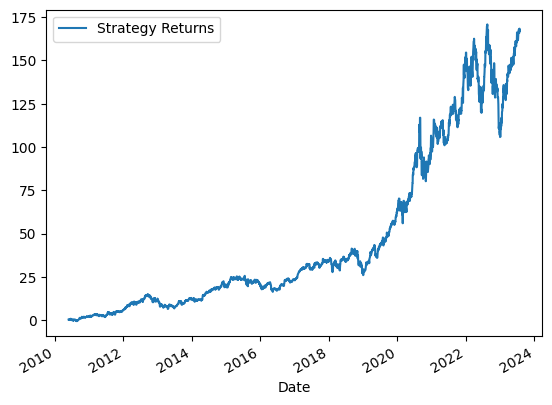

In [11]:
df['Prediction'] = np.append(predict_train,predict_test)

df['Strategy Returns'] = np.where(df['Prediction'].eq("1"),df['Open'].shift(-2)-df['Open'].shift(-1),0)

df['Strategy Returns'] = df['Strategy Returns'].cumsum()

df.plot(y='Strategy Returns')

plt.plot()



In [12]:
prediction = df.iloc[-1]['Prediction']

if prediction == "-1":
  print("Today's return forecast : UP")
else:
  print("Today's return forecast : DOWN")

Today's return forecast : DOWN
